# Study of Analogy based Learning - Image Classification


In this notebook, we investigate the following question:

- Do the distance-based metrics (e.g., Minkowski) provide a reliable measure of similarity between the images of the same class and different classes? 

The **analogy based** learning models such as K-Nearest Neighbors (K-NN) use distance similarity metric to classify images. Image pixels are considered as features. Two images are "similar" (share the same semantic identity or class label) if their pixel-wise Minkowski distance is small. Using the **Euclidean distance** metric as a measure of similarity, we compare the intra-class and inter-class distances. We show that:

- The distance-based metrics (e.g., Minkowski) are not effective, when applied at pixel level, for determining similarity between the images. The inter-class distance is not necessarily and always larger/different from the intra-class distance. It depends on the dataset.



## Tasks

Our similarity analysis study is performed via three tasks.

- Task 1: Compute Inter-class & Intra-class Euclidean Distance

- Task 2: Compute the Euclidean Distance between an Image and Its Augmented Versions

- Task 3: Visual Similarity Analysis by Projecting the Images on a 2D Space


## Dataset

For this analysis, we use two popular Machine Learning (ML) image datasets: MNIST handwritten digits & CIFAR-10.

- While the images of the MNIST dataset are "normalized" (centered and similar background), the images of the CIFAR-10 dataset has a lot of variations.


### MNIST

The MNIST (Modified National Institute of Standards and Technology) dataset contains 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents.

Each image is grayscale 28 x 28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black).


### CIFAR-10
The CIFAR-10 (Canadian Institute For Advanced Research) dataset contains 60,000 images of 10 different classes: airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. 

Each image is color with 32 x 32 x 3 pixels. 


## Summary of Observations


- In the MNIST dataset, there exists a global pattern in the pixel distribution of the same digit across all images of its category. The MNIST data is relatively clean. Digits are preprocessed by normalizing the size and centered in a fixed-size image. On the other hand, we observe a lot of variatiosn in the CIFAR-10 images of the same object. 

- The background pixels in the MNIST images follow a silimar pattern in all images belonging to the same class. However, in CIFAR-10 images, there are a lot of variations in the background pixels across the images of the same object.

- In the MNIST dataset, the intra-class distance is generally smaller than the inter-class distance. However, this is not true in the CIFAR-10 dataset.




- In MNIST, the pixel-level similarity is good enough to determine the semantic identity of the images. This is due to the fact that MNIST images have a strong bias. This bias is manifested as follows.

        -- Images are centered

        -- Less variation in the distribution of the pixels of the same class

        -- Share the same background

- However, the CIFAR-10 images don't have this bias. As a consequence, pixel level analogy does not lend useful to determine the semantic idetity.



## Beyond Raw Pixel Based Similarity: Is Analogy based Learning Effective?

The distance metric does not provide a reliable measure, when applied at the pixel level, to determine semantic identity of an image. It doesn't mean that the distance based technique or analogy based reasoning in general is flawed/weak. The similarity based approach is effective when more expressive and powerful high-level features are extracted from raw pixels. In other words, while distance measures at the raw pixel level produce spurious results, similarity calculation on the high-level features reveal semantic identity.

The following papers achieve state-of-the-art results on image classification by applying the K-NN analogy based approach on the learned features.

- Xu et al. (2020) Hierarchical Semantic Aggregation for Contrastive Representation Learning https://arxiv.org/pdf/2012.02733v1.pdf

- Caron et el. (2021) Unsupervised Learning of Visual Features by Contrasting Cluster Assignments https://arxiv.org/pdf/2006.09882.pdf

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

from sklearn.metrics.pairwise import euclidean_distances

from scipy.ndimage.interpolation import shift, rotate
from scipy.ndimage import gaussian_filter

from sklearn.manifold import TSNE

from tensorflow import keras

## MNIST

We directly load the MNIST dataset using the Keras API:
https://keras.io/api/datasets/mnist/

The train set contains 60,000 images, and the test set contains 10,000 images.

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Scale the data
X_train = X_train/255.0
X_test = X_test/255.0


print("\nShape of Training Samples: ", X_train.shape)
print("Shape of Training Labels: ", y_train.shape)

print("\nShape of Testing Samples: ", X_test.shape)
print("Shape of Testing Labels: ", y_test.shape)


Shape of Training Samples:  (60000, 28, 28)
Shape of Training Labels:  (60000,)

Shape of Testing Samples:  (10000, 28, 28)
Shape of Testing Labels:  (10000,)


# MNIST - Task 1: Compute Inter-class & Intra-class Euclidean Distance

For task 1, we create two lists:
- List containing images from the same class
- List containing images from another class


## MNIST: Create a List Containing Samples of the Same Class

We create a list of samples belonging to the same class (digit 9). Each image is labeled with the digit it represents.

- By changing the label (class_index), we can visualize images of a different class.

In [3]:
samples_any_class_mnist = []

class_index = 9 # class index

count = 0
for i in range(len(X_train)):
    if(y_train[i] == class_index):
        samples_any_class_mnist.append(X_train[i])

## MNIST: Compute Euclidean Distance Between the Images of the Same Class

We select the first 64 images of the same class and compute the distance between the first image with the 64 images. Then, we display these 64 images with their distance measures.

In [4]:
distances_mnist = []

for i in range(64):
    current_image = samples_any_class_mnist[0].reshape(1, 784)
    another_image = samples_any_class_mnist[i].reshape(1, 784)
    distances_mnist.append(euclidean_distances(current_image, another_image))

## MNIST: Display A Set of Samples Belonging to the Same Class

We display 64 samples of class "9".

For displaying the image data, we use matplotlib.pyplot's imshow() function:
https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.imshow.html

Below each image we show its Euclidean distance from the first image (top-left). 

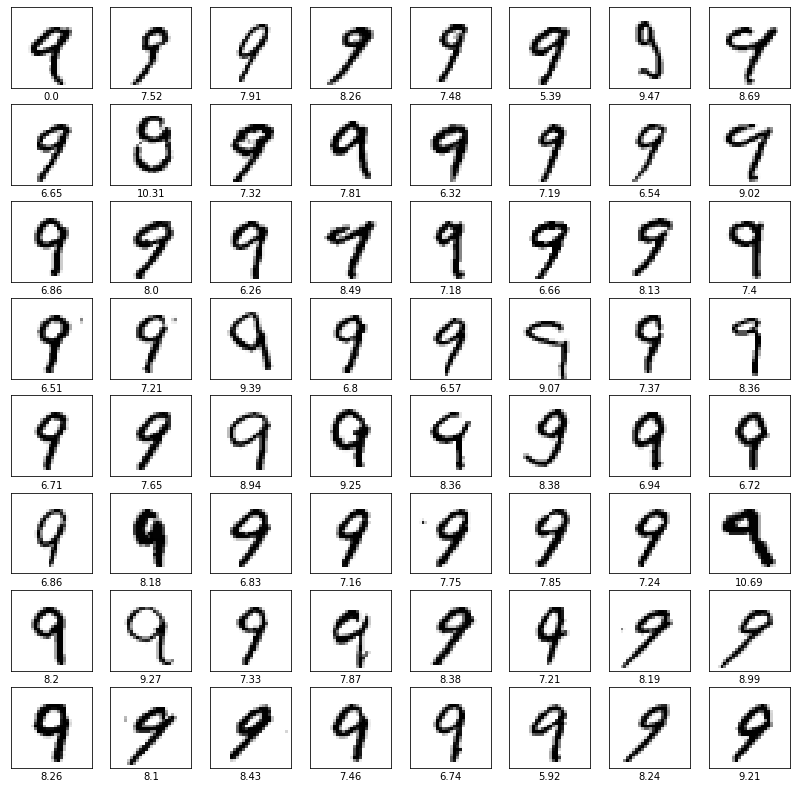

In [5]:
plt.figure(figsize=(14,14))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(samples_any_class_mnist[i], cmap=plt.cm.binary)
    plt.xlabel(np.round(distances_mnist[i][0][0], 2))
plt.show()

## MNIST Observation: Distance Across the Same Class

Observe that the distance between the first image and the remaining images of the same class is less than 9, with a few exceptions.

Now let's compute the distance of the first image (top-left above) with images from another class (e.g., 5).

## MNIST: Create a List Containing Samples of Another Class

We create a list of samples belonging to another class (digit 5).  

In [6]:
samples_another_class_mnist = []

class_index = 5 # class index

count = 0
for i in range(len(X_train)):
    if(y_train[i] == class_index):
        samples_another_class_mnist.append(X_train[i])

## Compute Inter-Class Euclidean Distance 

We select the first 64 images of this new class. We want to compute the distance of these 64 images of digit "5" with an image of digit "9". 

For convenience, we store an image of "9" as the first image in the list below. Then, compute the distance between "9" with the 64 images. 

In [7]:
samples_another_class_mnist[0] = samples_any_class_mnist[0]

distances_mnist_another_class = []

for i in range(64):
    current_image = samples_another_class_mnist[0].reshape(1, 784)
    another_image = samples_another_class_mnist[i].reshape(1, 784)
    distances_mnist_another_class.append(euclidean_distances(current_image, another_image))

## MNIST: Display A Set of Samples Belonging to Two Classes

We display 63 images of "5" and an image of "9" (the first image).

Below each image we show its Euclidean distance from the first image (top-left). 

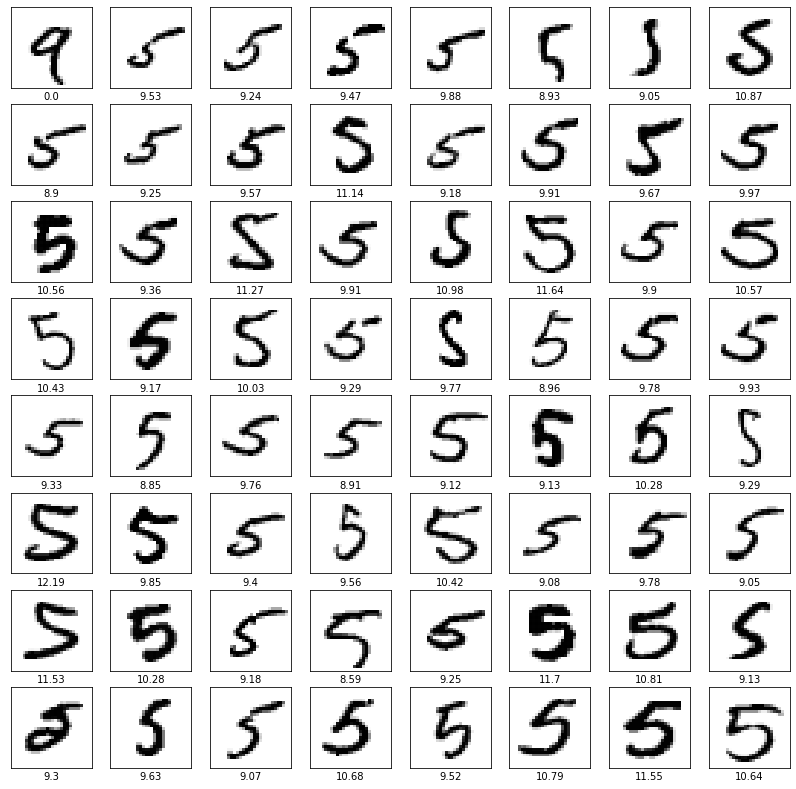

In [8]:
plt.figure(figsize=(14,14))

for i in range(64):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(samples_another_class_mnist[i], cmap=plt.cm.binary)
    plt.xlabel(np.round(distances_mnist_another_class[i][0][0], 2))
plt.show()

## MNIST Task 1 - Observation: Inter-Class Distance 

Observe that the distance between the image of "9" (first image) and the images of "5" (remaining images) is generally greater than 9, with a few exceptions.

- In other words, inter-class distance is larger, which is intuitive.

However, in case of the images in the CIFAR-10 dataset, we will see that there is no significant difference in the inter-class and intra-class distances.

# MNIST - Task 2: Compute the Euclidean Distance between an Image and Its Augmented Versions

For task 2, we create augmented versions of the same image by distorting it through:
- Shifting: left & below
- Rotating: 90 degree & 180 degree

## Functions for Creating Augmented Images

In [9]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])


def rotate_image(image, angle):
    image = image.reshape((28, 28))
    rotated_image = rotate(image, angle, cval=0, mode="constant", reshape=False)
    #rotated_image = rotate(image, angle)
    return rotated_image.reshape([-1])

## Analyze Similarity Between an Image and Its Augmented Versions

We plot the original & the augmented images. Below each image we show its Euclidean distance from the original image.

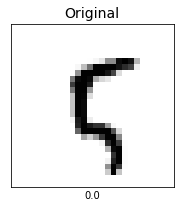

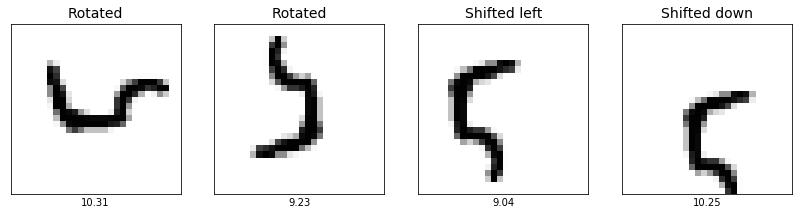

In [10]:
# Select an image
original_image = X_train[100]

distance_original = euclidean_distances(original_image.reshape(1, 784), original_image.reshape(1, 784))

# Create two rotated versions of the image
rotated_image_1 = rotate_image(original_image, 90)
rotated_image_2 = rotate_image(original_image, 180)

# Create two shifted versions of the image
shifted_image_down = shift_image(original_image, 0, 5)
shifted_image_left = shift_image(original_image, -5, 0)

# Create two noisy versions of the image
gaussian_image_1 = add_gaussian_noise_image(original_image, 1)
gaussian_image_2 = add_gaussian_noise_image(original_image, 1.5)


# Computed the Euclidean distance of the augmented images from the original image
distance_rotated_1 = euclidean_distances(original_image.reshape(1, 784), rotated_image_1.reshape(1, 784))
distance_rotated_2 = euclidean_distances(original_image.reshape(1, 784), rotated_image_2.reshape(1, 784))

distance_shifted_1 = euclidean_distances(original_image.reshape(1, 784), shifted_image_down.reshape(1, 784))
distance_shifted_2 = euclidean_distances(original_image.reshape(1, 784), shifted_image_left.reshape(1, 784))

distance_gaussian_1 = euclidean_distances(original_image.reshape(1, 784), gaussian_image_1.reshape(1, 784))
distance_gaussian_2 = euclidean_distances(original_image.reshape(1, 784), gaussian_image_2.reshape(1, 784))


# Plot the original & the augmented images
# Below each image we show its Euclidean distance from the original image (top-left).
plt.figure(figsize=(3,3))
plt.title("Original", fontsize=14)
plt.imshow(original_image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.xlabel(np.round(distance_original[0][0], 2))
plt.xticks([])
plt.yticks([])
plt.show()

plt.figure(figsize=(14,8))
plt.subplot(141)
plt.title("Rotated", fontsize=14)
plt.imshow(rotated_image_1.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.xlabel(np.round(distance_rotated_1[0][0], 2))
plt.xticks([])
plt.yticks([])

plt.subplot(142)
plt.title("Rotated", fontsize=14)
plt.imshow(rotated_image_2.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.xlabel(np.round(distance_rotated_2[0][0], 2))
plt.xticks([])
plt.yticks([])

plt.subplot(143)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.xlabel(np.round(distance_shifted_1[0][0], 2))
plt.xticks([])
plt.yticks([])

plt.subplot(144)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.xlabel(np.round(distance_shifted_2[0][0], 2))
plt.xticks([])
plt.yticks([])

plt.show()

## MNIST Task 2 - Observation

Observe that the distance between the image of "5" (original image) and the augmented versions of it is greater than 9. However, in task 1, we observed that the intra-class distance was smaller than 9. Current task indicates that after augmenting the image, the intra-class distance becomes larger. In other words, the augmented images become dissimilar to the original image when we compare them pixel by pixel.

## Visualization of the MNIST Dataset in 2D using t-SNE
In this notebook we use the t-SNE (t-Distributed Stochastic Neighbor Embedding) algorithm to visualize the MNIST images in 2D.

The t-SNE is a Manifold Learning algorithm that reduces dimensionality while trying to keep similar instances close and dissimilar instances apart.


## Dimensionality Reduction using t-SNE

Dimensionality reduction using t-SNE on the full 60,000 images takes a very long time. 

Thus, we use a random subset of 10,000 images for projecting it onto 2D.

In [11]:
m = 10000
idx = np.random.permutation(60000)[:m]

X = X_train[idx]
y = y_train[idx]

X = X.reshape(X.shape[0], 784)


print("\nReduced No. of Samples: ", X.shape)
print("Reduced No. of Labels: ", y.shape)


Reduced No. of Samples:  (10000, 784)
Reduced No. of Labels:  (10000,)


## Reduce Dimensionality to 2D

In [12]:
%%time

t0 = time.time()
tsne = TSNE(n_components=2, random_state=42)
X_tsne_reduced = tsne.fit_transform(X)
t1 = time.time()

duration_tsne = t1 - t0

print("The t-SNE takes {:.1f}s.".format(duration_tsne))
print("\n")

The t-SNE takes 170.1s.


CPU times: user 7min 25s, sys: 1min, total: 8min 26s
Wall time: 2min 50s


## Plot the 2D Dataset

We use Matplotlib's scatter() function to plot a scatterplot, using a different color for each digit (0 = blue, 9 = dark red, etc.).

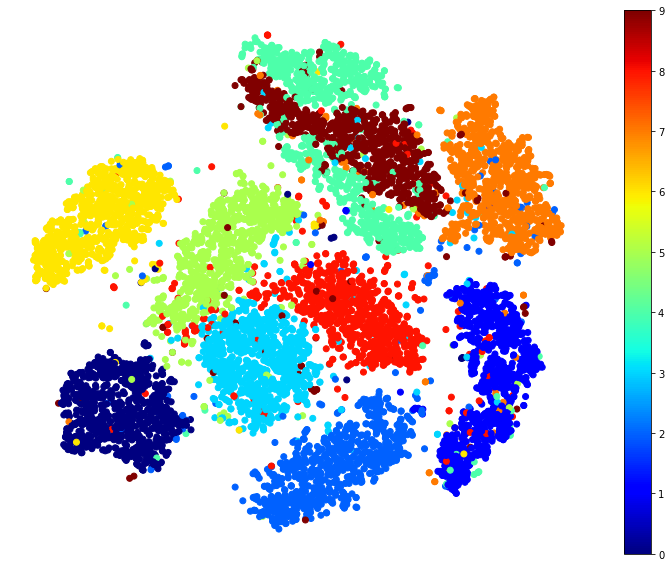

In [13]:
plt.figure(figsize=(13,10))
plt.scatter(X_tsne_reduced[:, 0], X_tsne_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

## MNIST - Task 3 Observation:

This plot tells us that the numbers are genrally easily distinguishable from the others (e.g., 0s, 6s, and most 8s are rather well separated clusters). To further investigate this phenomenon, we plot the original images using a 2D scatter plot.


## Function to Display Colored Digits on a Scatterplot

We define a plot_digits() function that creates scatterplot using a different color for each digit and performs the followng two things.

- Write colored digits on the scatterplot, with a minimum distance guaranteed between these digits. 

- Plot digit images on the scatterplot. 

In [14]:
def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

## Plot Digit Images on the Scatterplot

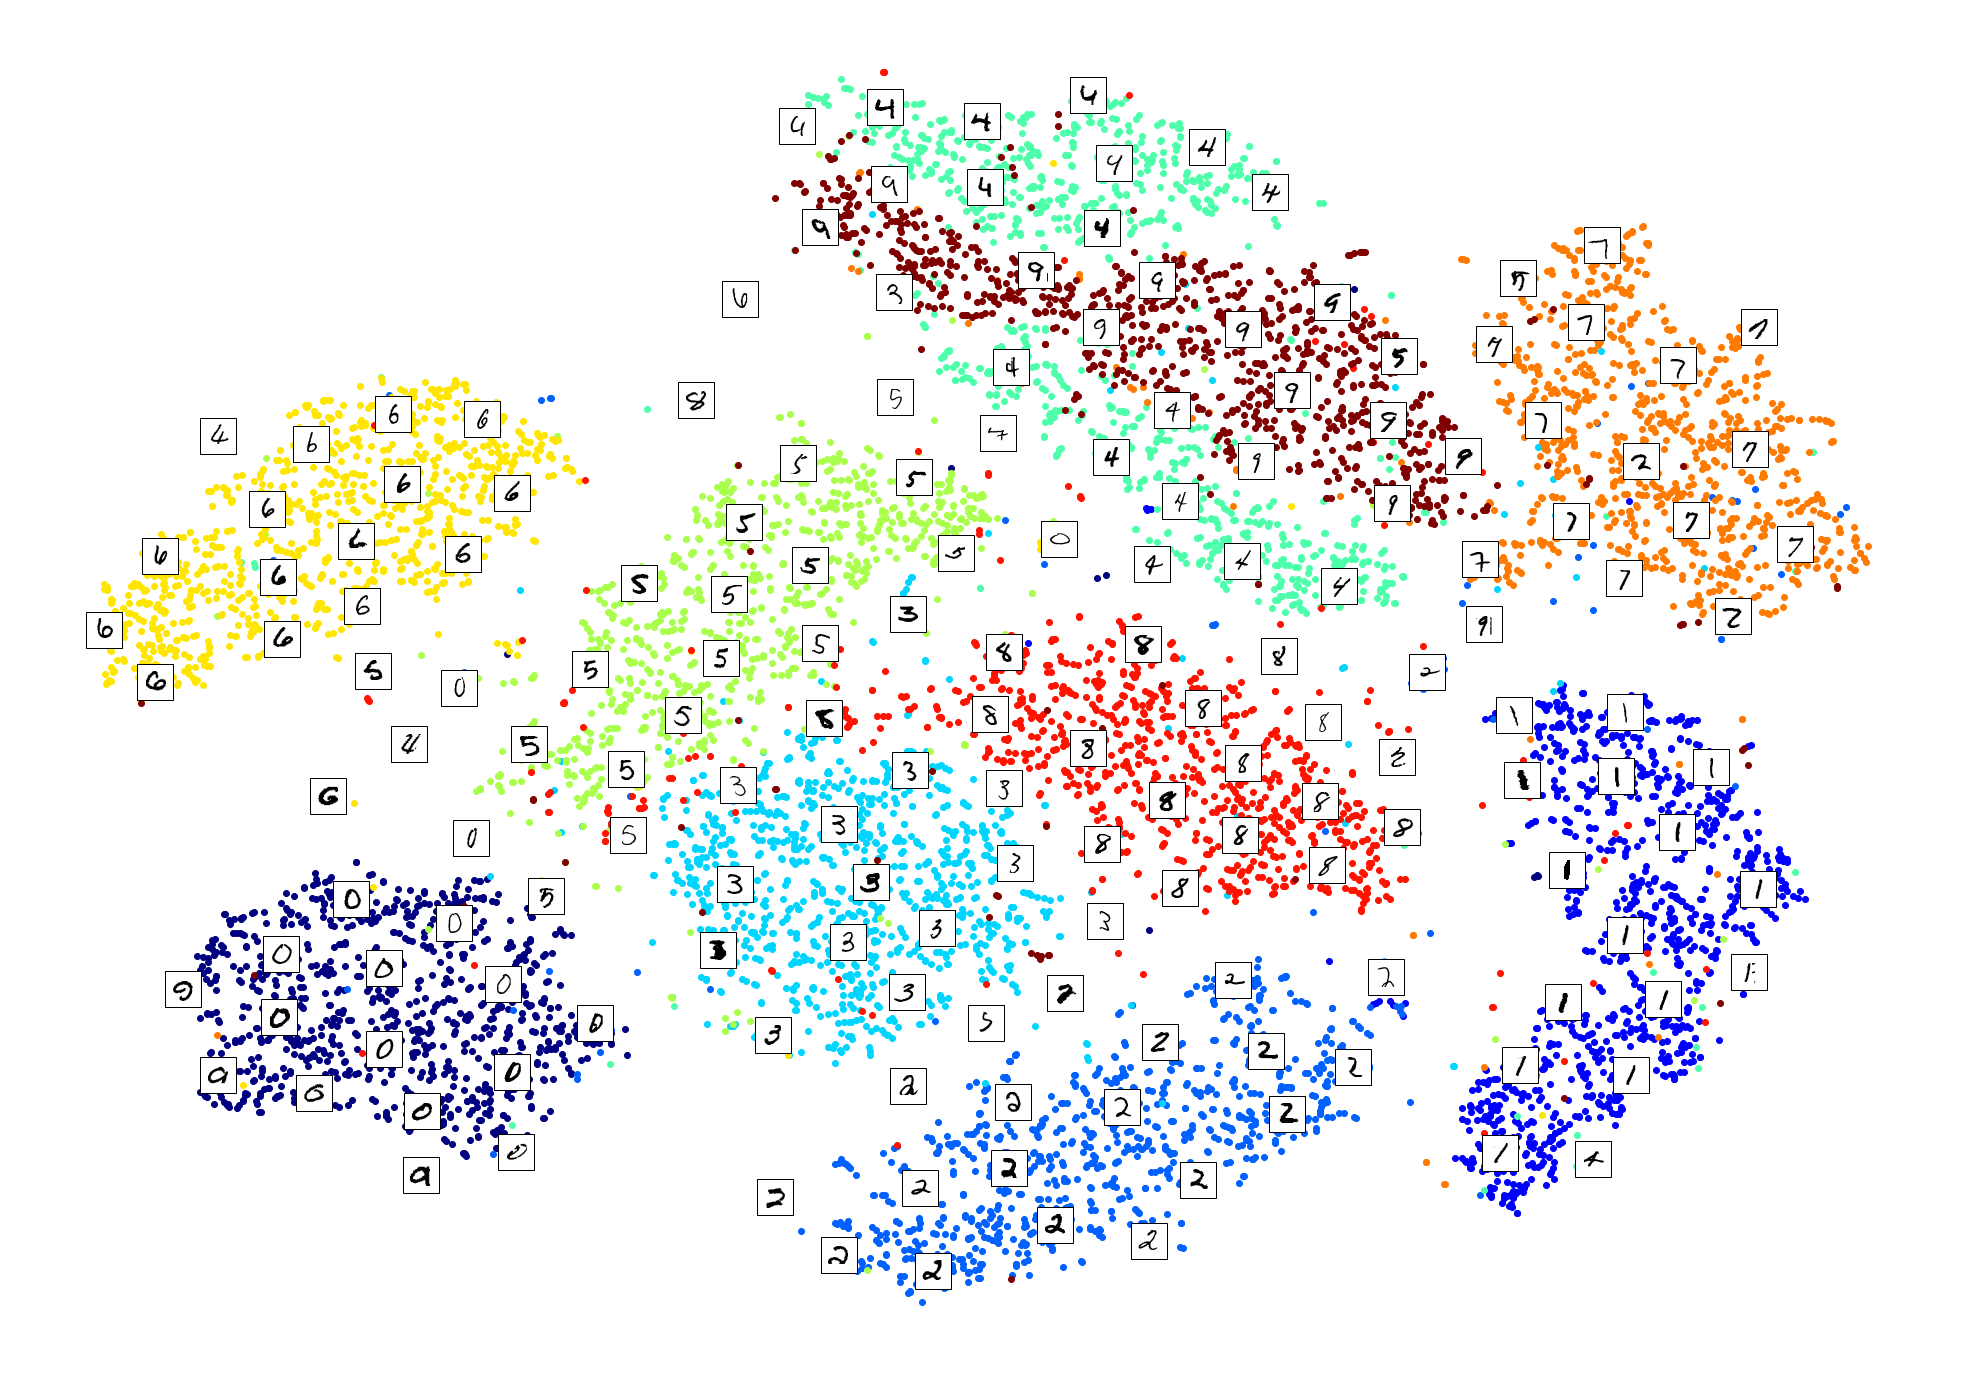

In [15]:
plot_digits(X_tsne_reduced, y, images=X, figsize=(35, 25))

## MNIST Task 3 - Observation

We observe that the generally the classes are distinguishable. The pixel-level similarity is good enough to determine the semantic identity of the images. This is due to the fact that MNIST images have a strong bias. This bias is manifested as follows. 

- Images are centered
- Less variation in the distribution of the pixels of the same class
- Share the same background


We will see that CIFAR-10 images don't have this bias. As a consequence, pixel level analogy will not lend useful to determine the semantic identity.

# CIFAR-10

We directly load the CIFAR-10 dataset using the Keras API:
https://keras.io/api/datasets/cifar10/

The train set contains 50,000 images, and the test set contains 10,000 images.

In [16]:
(X_train_cifar, y_train_cifar), (X_test_cifar, y_test_cifar) = keras.datasets.cifar10.load_data()

# Scale the data
X_train_cifar = X_train_cifar/255.0
X_test_cifar = X_test_cifar/255.0

print("\nShape of Training Samples: ", X_train_cifar.shape)
print("Shape of Training Labels: ", y_train_cifar.shape)

print("\nShape of Testing Samples: ", X_test_cifar.shape)
print("Shape of Testing Labels: ", y_test_cifar.shape)


Shape of Training Samples:  (50000, 32, 32, 3)
Shape of Training Labels:  (50000, 1)

Shape of Testing Samples:  (10000, 32, 32, 3)
Shape of Testing Labels:  (10000, 1)


## CIFAR-10: Create a List of Class Names

In [17]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(class_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# CIFAR-10 - Task 1: Compute Inter-class & Intra-class Euclidean Distance

For task 1, we create two lists:
- List containing images from the same class
- List containing images from another class


## CIFAR-10: Create a List Containing Samples of the Same Class

We use a class index (from the above list) to create a list of samples belonging to that class (i.e., truck).

In [18]:
samples_any_class_cifar10 = []

class_index = 9 # class index

for i in range(len(X_train_cifar)):
    if(y_train_cifar[i] == class_index):
        samples_any_class_cifar10.append(X_train_cifar[i])

## CIFAR-10: Compute Euclidean Distance Between the Images of the Same Class

We select the first 64 images of the same class (i.e., truck) and compute the distance between the first image with the 64 images. Then, we display these 64 images with their distance measures.

In [19]:
distances_cifar10 = []

for i in range(64):
    current_image = samples_any_class_cifar10[0].reshape(1, 3072)
    another_image = samples_any_class_cifar10[i].reshape(1, 3072)
    distances_cifar10.append(euclidean_distances(current_image, another_image))

## CIFAR-10: Display A Set of Samples Belonging to the Same Class

We display 64 images of the class "truck".

Below each image we show its Euclidean distance from the first image (top-left). 

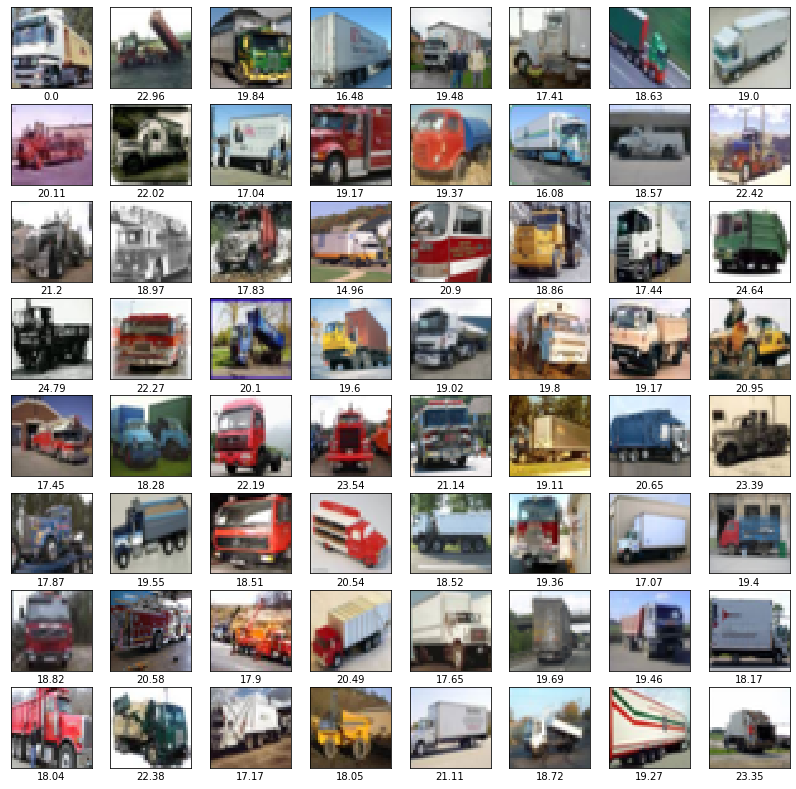

In [20]:
plt.figure(figsize=(14,14))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(samples_any_class_cifar10[i], cmap=plt.cm.binary)
    plt.xlabel(np.round(distances_cifar10[i][0][0], 2))
plt.show()

## CIFAR-10 Observation: Distance Across the Same Class

Observe that the distance between the first image and the remaining images of the same class varies in the range between 17 to 22.

Now let's compute the distance of the first image (top-left above) and images from another class (e.g., dog).

## CIFAR-10: Create a List Containing Samples of Another Class

We create a list of images belonging to another class (i.e., dog).  

In [21]:
samples_another_class_cifar10 = []

class_index = 5 # class index

count = 0
for i in range(len(X_train_cifar)):
    if(y_train_cifar[i] == class_index):
        samples_another_class_cifar10.append(X_train_cifar[i])

## CIFAR-10: Compute Inter-Class Euclidean Distance 

We select the first 64 images of this new class. We want to compute the distance of these 64 images of "dog" with an image of a "truck". 

For convenience, we store the image of a "truck" as the first image in the list below. Then, compute the distance between "truck" with the 64 images. 

In [22]:
samples_another_class_cifar10[0] = samples_any_class_cifar10[0]

distances_cifar10_another_class = []

for i in range(64):
    current_image = samples_another_class_cifar10[0].reshape(1, 3072)
    another_image = samples_another_class_cifar10[i].reshape(1, 3072)
    distances_cifar10_another_class.append(euclidean_distances(current_image, another_image))

## CIFAR-10: Display A Set of Samples Belonging to Two Classes

We display 63 images of "dog" and an image of a "truck" (first image).

Below each image we show its Euclidean distance from the first image (top-left). 

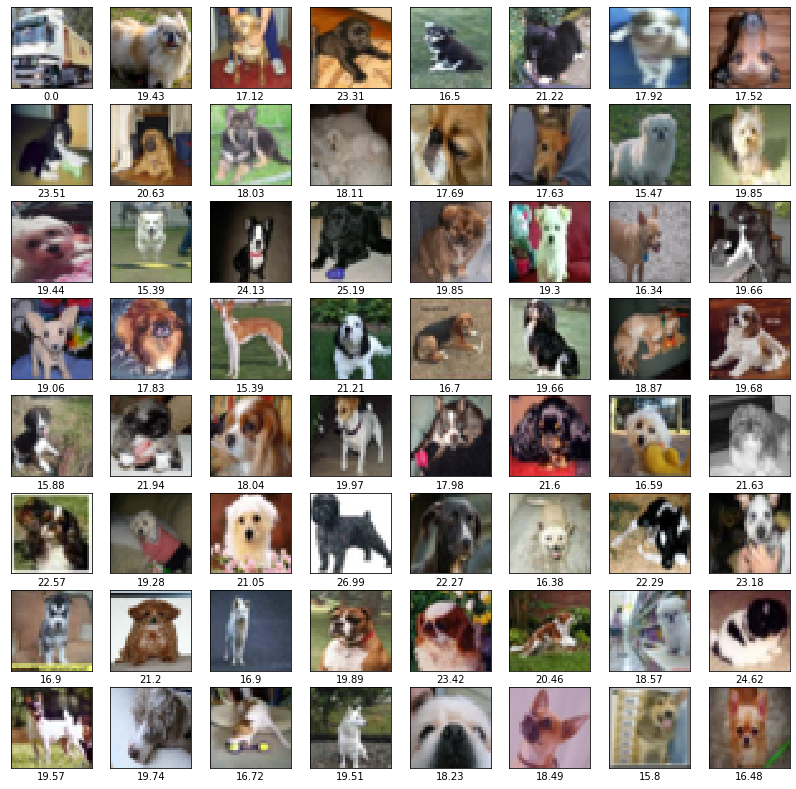

In [23]:
plt.figure(figsize=(14,14))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(samples_another_class_cifar10[i], cmap=plt.cm.binary)
    plt.xlabel(np.round(distances_cifar10_another_class[i][0][0], 2))
plt.show()

## CIFAR-10 Task 1 - Observation: Inter-Class Distance 

Observe that the distance between the image of "truck" (first image) and the images of "dog" (remaining images) is in the range of 15 to 22.

- The inter-class distance is not significantly different from the intra-class distance. 

Thus, a similary based approach (i.e., analogy based approach), when applied pixel-wise, will not yield better performance to differentiate images belonging to different classes in the CIFAR-10 dataset.

# CIFAR-10 - Task 2: Compute the Euclidean Distance between an Image and Its Augmented Versions

For task 2, we create augmented versions of the same image by distorting it through:
- Shifting: left & below
- Rotating: 90 degree & 180 degree

## Functions for Creating Augmented Images

In [24]:
def shift_image_cifar(image, dx, dy):
    image = image.reshape((32, 32, 3))
    shifted_image = shift(image, [dy, dx, 0], cval=0, mode="constant")
    return shifted_image.reshape([-1])


def rotate_image_cifar(image, angle):
    image = image.reshape((32, 32, 3))
    rotated_image = rotate(image, angle, cval=0, mode="constant", reshape=False)
    #rotated_image = rotate(image, angle)
    return rotated_image.reshape([-1])

## Analyze Similarity Between an Image and Its Augmented Versions

We plot the original & the augmented images. Below each image we show its Euclidean distance from the original image.

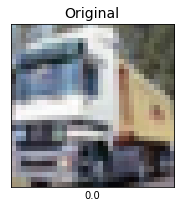

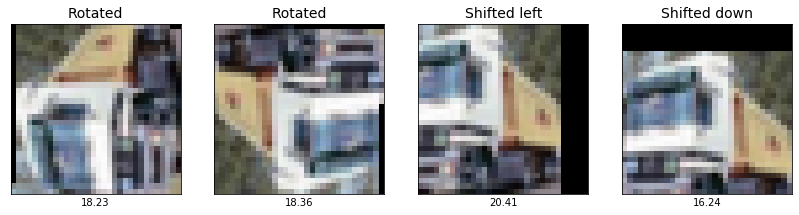

In [25]:
# Select an image
original_image_cifar = X_train_cifar[1]

distance_original_cifar = euclidean_distances(original_image_cifar.reshape(1, 3072), original_image_cifar.reshape(1, 3072))

# Create two rotated versions of the image
rotated_image_1_cifar = rotate_image_cifar(original_image_cifar, 90)
rotated_image_2_cifar = rotate_image_cifar(original_image_cifar, 180)

# Create two shifted versions of the image
shifted_image_down_cifar = shift_image_cifar(original_image_cifar, 0, 5)
shifted_image_left_cifar = shift_image_cifar(original_image_cifar, -5, 0)

# Create two noisy versions of the image
gaussian_image_1_cifar = add_gaussian_noise_image_cifar(original_image_cifar, 1)
gaussian_image_2_cifar = add_gaussian_noise_image_cifar(original_image_cifar, 1.5)


# Computed the Euclidean distance of the augmented images from the original image
distance_rotated_1_cifar = euclidean_distances(original_image_cifar.reshape(1, 3072), rotated_image_1_cifar.reshape(1, 3072))
distance_rotated_2_cifar = euclidean_distances(original_image_cifar.reshape(1, 3072), rotated_image_2_cifar.reshape(1, 3072))

distance_shifted_1_cifar = euclidean_distances(original_image_cifar.reshape(1, 3072), shifted_image_down_cifar.reshape(1, 3072))
distance_shifted_2_cifar = euclidean_distances(original_image_cifar.reshape(1, 3072), shifted_image_left_cifar.reshape(1, 3072))

distance_gaussian_1_cifar = euclidean_distances(original_image_cifar.reshape(1, 3072), gaussian_image_1_cifar.reshape(1, 3072))
distance_gaussian_2_cifar = euclidean_distances(original_image_cifar.reshape(1, 3072), gaussian_image_2_cifar.reshape(1, 3072))


# Plot the original & the augmented images
# Below each image we show its Euclidean distance from the original image (top-left)
plt.figure(figsize=(3,3))
plt.title("Original", fontsize=14)
plt.imshow(original_image_cifar.reshape(32, 32, 3), interpolation="nearest", cmap="Greys")
plt.xlabel(np.round(distance_original_cifar[0][0], 2))
plt.xticks([])
plt.yticks([])
plt.show()

plt.figure(figsize=(14,8))
plt.subplot(141)
plt.title("Rotated", fontsize=14)
plt.imshow(rotated_image_1_cifar.reshape(32, 32, 3), interpolation="nearest", cmap="Greys")
plt.xlabel(np.round(distance_rotated_1_cifar[0][0], 2))
plt.xticks([])
plt.yticks([])

plt.subplot(142)
plt.title("Rotated", fontsize=14)
plt.imshow(rotated_image_2_cifar.reshape(32, 32, 3), interpolation="nearest", cmap="Greys")
plt.xlabel(np.round(distance_rotated_2_cifar[0][0], 2))
plt.xticks([])
plt.yticks([])

plt.subplot(143)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left_cifar.reshape(32, 32, 3), interpolation="nearest", cmap="Greys")
plt.xlabel(np.round(distance_shifted_1_cifar[0][0], 2))
plt.xticks([])
plt.yticks([])

plt.subplot(144)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down_cifar.reshape(32, 32, 3), interpolation="nearest", cmap="Greys")
plt.xlabel(np.round(distance_shifted_2_cifar[0][0], 2))
plt.xticks([])
plt.yticks([])

plt.show()

## CIFAR-10 Task 2 - Observation


Observe that the distance between the image of "truck" (original image) and the augmented versions of it are in the range of 15 to 22. This range is similar to what we observed in task 1. It indicates that there is no significant difference between the original image and its augmented versions. The pixel-wise comparison doesn't reveal the fact that images are distorted or "different".

### Explanation

The dimension of the CIFAR-10 images (i.e., 3072) is significantly larger than that of the MNIST images (i.e., 784). Thus, CIFAR-10 images are more prone to the **curse of dimensionality**: there are no nearest neighbors in high dimension. In this task, the original image and its three augmented versions are equally apart. This is a direct consequence of the high-dimensional pixel-based similarity measure.

## CIFAR-10 - Task 3: Visual Similarity Analysis by Projecting the Images on a 2D Space

We visually analyze the similarity of the images by projecting those on a 2D space. For this, we use the t-Distributed Stochastic Neighbor Embedding (t-SNE) technique of dimensionality reduction. It projects the data into a lower dimension by maintaining their pair-wise local distance. Thus, if two images are "close" or "similar" in high-dimension, they will be spatially closer in 2D, which we will be able to visually inspect.

## Dimensionality Reduction using t-SNE

Dimensionality reduction using t-SNE on the full 50,000 images takes a very long time. Thus, we use a random subset of 10,000 images for projecting it onto 2D.

In [26]:
m = 10000
idx = np.random.permutation(50000)[:m]

X_cifar = X_train_cifar[idx]
y_cifar = y_train_cifar[idx]

X_cifar = X_cifar.reshape(X_cifar.shape[0], 3072)

y_cifar = y_cifar.ravel()

print("\nReduced No. of Samples: ", X_cifar.shape)
print("Reduced No. of Labels: ", y_cifar.shape)


Reduced No. of Samples:  (10000, 3072)
Reduced No. of Labels:  (10000,)


## Reduce Dimensionality to 2D

In [27]:
%%time

t0 = time.time()
tsne_cifar  = TSNE(n_components=2, random_state=42)
X_tsne_reduced_cifar  = tsne_cifar.fit_transform(X_cifar)
t1 = time.time()

duration_tsne = t1 - t0

print("The t-SNE takes {:.1f}s.".format(duration_tsne))
print("\n")

The t-SNE takes 617.7s.


CPU times: user 16min 49s, sys: 1min 48s, total: 18min 37s
Wall time: 10min 17s


## Plot the 2D Dataset
We use Matplotlib's scatter() function to plot a scatterplot, using a different color for each digit (0 = blue, 9 = dark red, etc.).

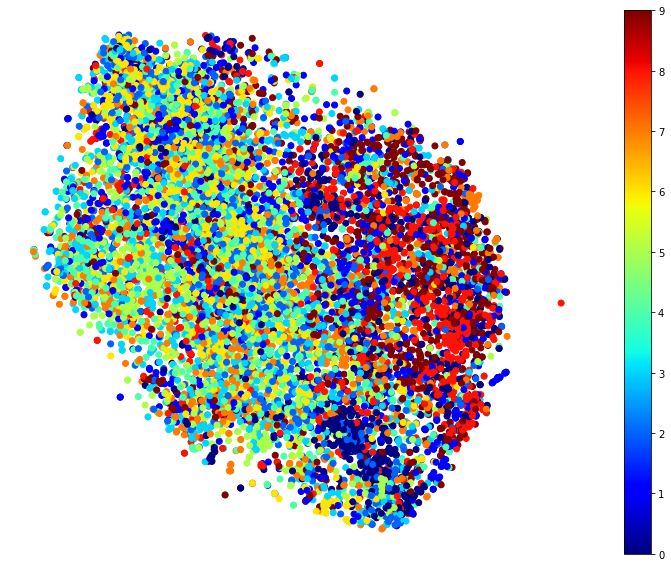

In [28]:
plt.figure(figsize=(13,10))
plt.scatter(X_tsne_reduced_cifar[:, 0], X_tsne_reduced_cifar[:, 1], c=y_cifar, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

## CIFAR-10 - Task 3 Observation:

This plot tells us that the classes are visually indistinguishable in 2D. There is no significant difference between intra-class and inter-class distance. To further investigate this phenomenon, we plot the original images using a 2D scatter plot.

## Function to Display Objects on a Scatterplot

We define a plot_objects() function that creates scatterplot using a different color for each digit and performs the followng two things.

- Write colored objects on the scatterplot, with a minimum distance guaranteed between these objects.

- Plot object images on the scatterplot.

In [29]:
def plot_objects(X, y, min_distance=0.05, images=None, figsize=(16, 12)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    objects = np.unique(y)
    for object in objects:
        plt.scatter(X_normalized[y == object, 0], X_normalized[y == object, 1], c=[cmap(object / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(32, 32, 3)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

## Plot Object Images on the Scatterplot

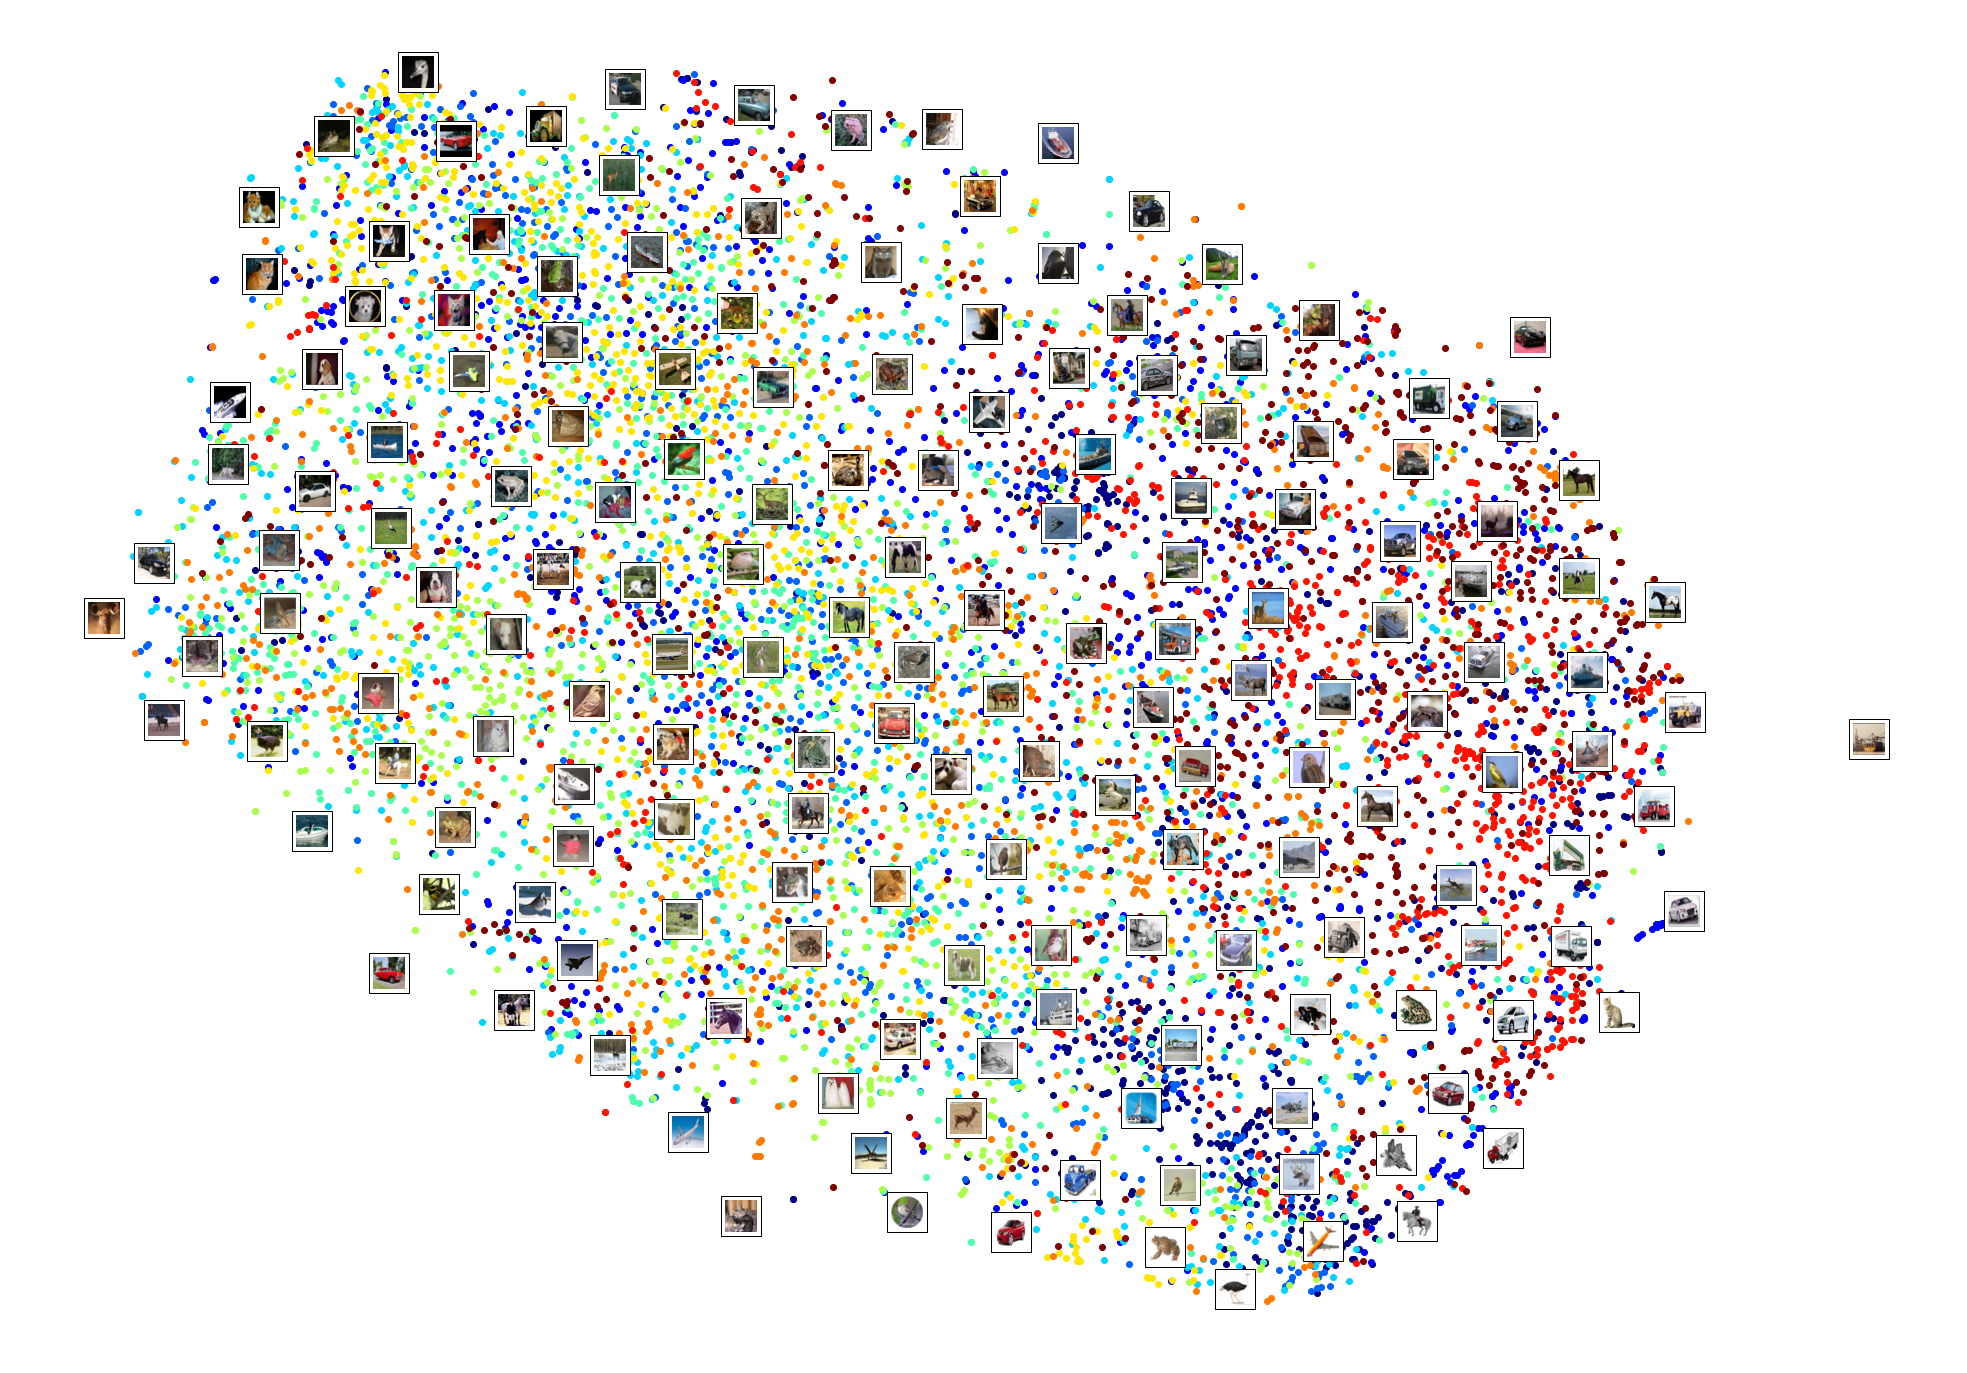

In [30]:
plot_objects(X_tsne_reduced_cifar, y_cifar, images=X_cifar, figsize=(35, 25))

## CIFAR-10 Task 3 - Observation

We observe that the classes are indistinguishable. The t-SNE algorithm relies on a distance-based metric to compute pair-wise similarity of the images at the pixel level. As a consequence, as argued earlier, there is no significant difference between intra-class and inter-class distance.

Notice that there is a **strong effect of background** on similarity computation. Images are spatially close/similar due to their color distribution and type of their background. The similarity is not determined by their semantic label. Two different objects such as a bird and an airplane are "similar" because they share the same background. On the other hand, two objects belonging to the same class could be far away due the variation in their background.


# Beyond Raw Pixel Based Similarity: Is Analogy based Learning Effective?

The distance metric does not provide a reliable measure, when applied at the pixel level, to determine semantic identity of an image. It doesn't mean that the distance based technique or analogy based reasoning in general is flawed/weak. The similarity based approach is effective when more expressive and powerful high-level features are extracted from raw pixels. In other words, while distance measures at the raw pixel level produce spurious results, similarity calculation on the high-level fetures reveal semantic identity.

The following papers achieve state-of-the-art results on image classification by applying the K-NN analogy based approach on the learned features.

- Xu et al. (2020) Hierarchical Semantic Aggregation for Contrastive Representation Learning https://arxiv.org/pdf/2012.02733v1.pdf

- Caron et el. (2021) Unsupervised Learning of Visual Features by Contrasting Cluster Assignments
https://arxiv.org/pdf/2006.09882.pdf


